In [ ]:
from skimage.filters import try_all_threshold
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
import skimage

In [3]:
# https://pypi.org/project/doxapy/
from PIL import Image, ImageFilter
import numpy as np
import doxapy
from matplotlib import pyplot as plt

algorithms = ['OTSU', 'BERNSEN', 'NIBLACK', 'SAUVOLA', 'WOLF', 'GATOS', 'NICK', 'SU', 'TRSINGH', 'BATAINEH', 'ISAUVOLA', 'WAN']

def read_image(file):
    im1 = Image.open(file).convert('L')
    im1 = im1.filter(ImageFilter.GaussianBlur(radius = 0.8)) 
    return np.array(im1)

def try_all_binarize(gray_img):
    # print(algorithms)
    all_bins = []
    for i in range(len(algorithms)):
        binary_image = np.empty(gray_img.shape, gray_img.dtype)
        # Pick an algorithm from the DoxaPy library and convert the image to binary
        facsimile = doxapy.Binarization(getattr(doxapy.Binarization.Algorithms, algorithms[i]))
        facsimile.initialize(gray_img)
        facsimile.to_binary(binary_image)
        # if algorithms[i]=="NIBLACK":
        #     skimage.io.imsave("/Users/sophial/Downloads/niblack.png", binary_image)
        all_bins.append(binary_image)
    return all_bins


[[197 199 201 ... 230 228 220]
 [199 201 201 ... 222 222 224]
 [201 201 201 ... 218 224 226]
 ...
 [180 184 185 ... 201 199 203]
 [182 185 189 ... 199 199 197]
 [187 191 193 ... 199 199 199]]


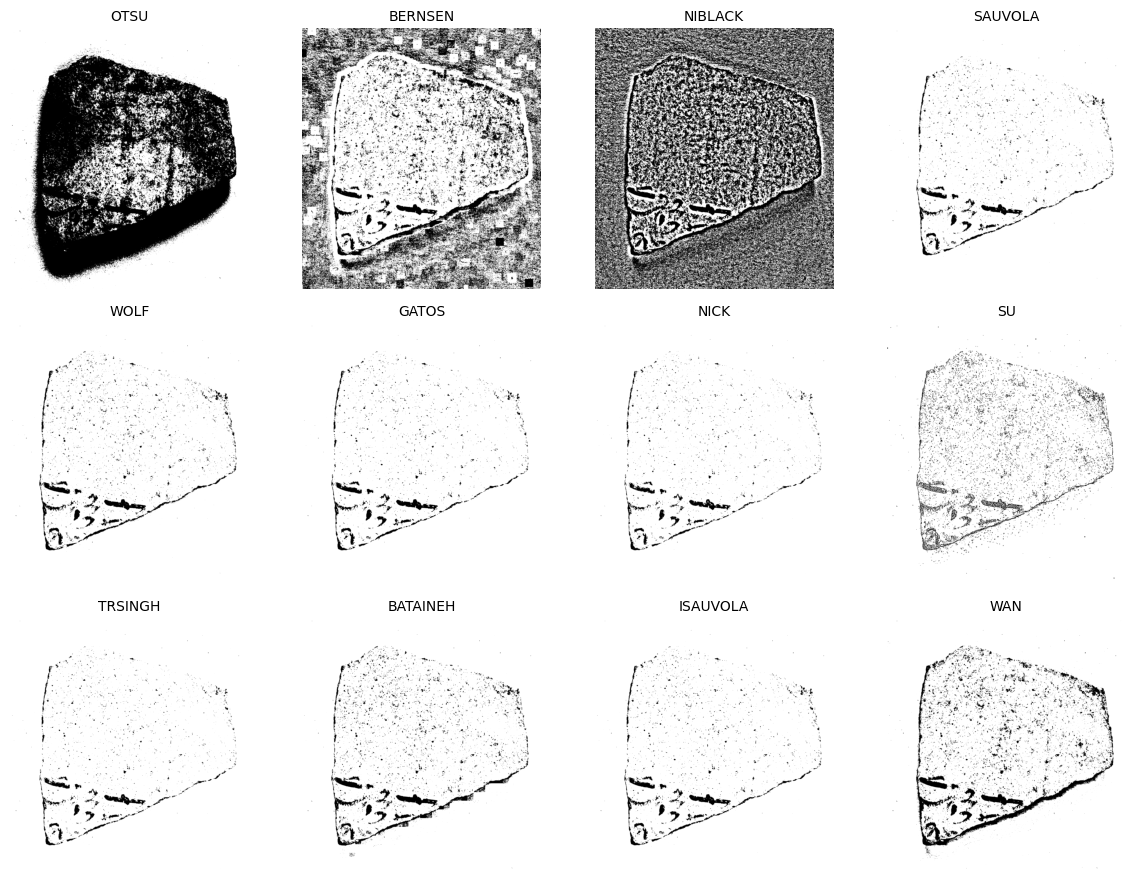

In [ ]:
import cv2
from skimage import data

grayscale_image = read_image("original-1-7.JPG")

# image = skimage.io.imread("/Users/sophial/Desktop/met.png")
# hsv_image = skimage.color.rgb2hsv(image)
# val = hsv_image[:, :, 2]

# grayscale_image = data.astype(np.float64) / val.max # normalize the data to 0 - 1
# grayscale_image = 255 * grayscale_image # Now scale by 255
# img = data.astype(np.uint8)

img_n = cv2.normalize(src=grayscale_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# print(img_n)
# print(type(grayscale_image[0][0]), grayscale_image.shape)

images = try_all_binarize(img_n)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(algorithms[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

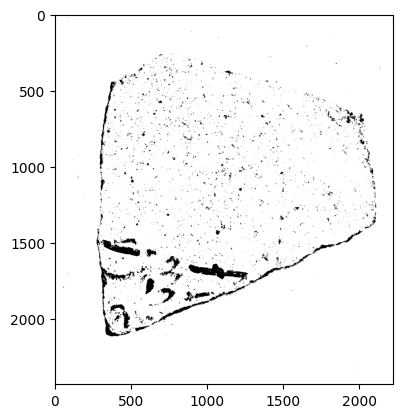

In [5]:
# Transforms the grayscale image buffer into binary with a single call
grayscale_image = read_image("original-1-7.JPG")

binary_image = np.empty(grayscale_image.shape, grayscale_image.dtype)
facsimile = doxapy.Binarization(doxapy.Binarization.Algorithms.WOLF)
facsimile.initialize(grayscale_image)
facsimile.to_binary(binary_image)

binary_img = Image.fromarray(grayscale_image)
plt.imshow(binary_image, cmap="gray")

skimage.io.imsave("./temp.png", binary_image)


In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import doxapy
import tifffile as tiff

def binarize(img):
    img = img.convert('L').filter(ImageFilter.GaussianBlur(radius = 0.8)) 
    gray_arr = np.array(img)

    binary_image = np.empty(gray_arr.shape, gray_arr.dtype)
    facsimile = doxapy.Binarization(doxapy.Binarization.Algorithms.WOLF)
    facsimile.initialize(gray_arr)
    facsimile.to_binary(binary_image)

    return binary_image


In [ ]:
im = Image.open('original-1-7.JPG').convert("RGBA")
img_arr = np.array(im)
binary_arr = binarize(im)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.fromarray(img_arr))
axes[1].imshow(Image.fromarray(binary_arr),cmap="gray")